<a href="https://colab.research.google.com/github/shraavyamc/nanopore-sequencing-qc/blob/main/analysis/nanopore_qc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import files
uploaded = files.upload()  # this will prompt you to select a file from your computer


Saving sample.fastq to sample.fastq


In [14]:
!git clone https://github.com/shraavyamc/nanopore-sequencing-qc.git


Cloning into 'nanopore-sequencing-qc'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 59 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (59/59), 19.51 KiB | 9.76 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
# Import required Python libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional: display plots inline in Colab
%matplotlib inline


In [23]:
import matplotlib.pyplot as plt
import numpy as np

def parse_fastq(file_path):
    sequences = []
    qualities = []
    with open(file_path, 'r') as f:
        while True:
            header = f.readline().strip()
            if not header:
                break
            seq = f.readline().strip()
            plus = f.readline().strip()
            qual = f.readline().strip()
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

file_path = "/content/sample.fastq"
sequences, qualities = parse_fastq(file_path)
print("Sequences:", sequences[:5])
print("Qualities:", qualities[:5])

Sequences: ['GATTACAAGT', 'CGTACGTAGC']
Qualities: ['IIIIIIIIII', 'JJJJJJJJJJ']


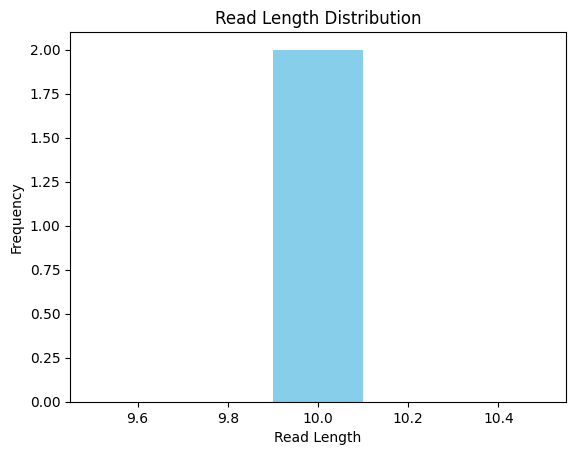

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt

# Calculate read lengths
read_lengths = [len(seq) for seq in sequences]

# Plot histogram
plt.hist(read_lengths, bins=5, color='skyblue')
plt.title("Read Length Distribution")
plt.xlabel("Read Length")
plt.ylabel("Frequency")
plt.show()

# Optional: save figure
plt.savefig("/content/read_length_hist.png")


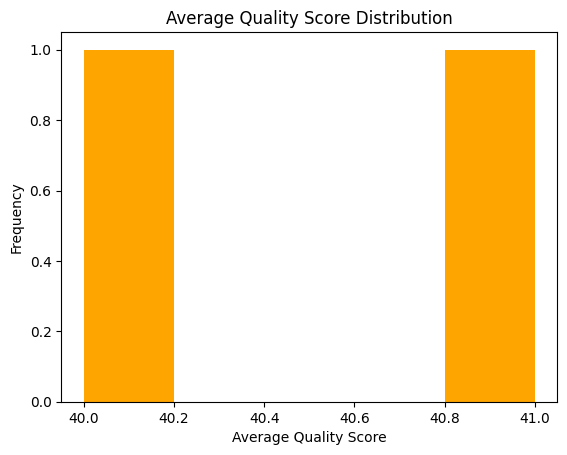

<Figure size 640x480 with 0 Axes>

In [25]:
import numpy as np

# Convert ASCII quality to numerical scores
avg_qual_scores = [np.mean([ord(c)-33 for c in q]) for q in qualities]

# Plot histogram
plt.hist(avg_qual_scores, bins=5, color='orange')
plt.title("Average Quality Score Distribution")
plt.xlabel("Average Quality Score")
plt.ylabel("Frequency")
plt.show()

# Optional: save figure
plt.savefig("/content/avg_quality_hist.png")
